# Análisis final para obtención de insights

In [ ]:
import snowflake.connector
import os
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Snowflake connection
snowflake_conn = snowflake.connector.connect(
    user=os.getenv("SNOWFLAKE_USER"),
    password=os.getenv("SNOWFLAKE_PASSWORD"),
    account=os.getenv("SNOWFLAKE_ACCOUNT"),
    warehouse=os.getenv("SNOWFLAKE_WAREHOUSE"),
    database='INSTACART_DB',
    schema='CLEAN'
)

In [30]:
# Función para obtener datos
def get_data(tabla):
    query = f'SELECT * FROM {tabla}'
    return pd.read_sql(query, snowflake_conn)  

In [31]:
df_aisles = get_data('AISLES')
df_departments = get_data('DEPARTMENTS')
df_instacart_orders = get_data('INSTACART_ORDERS')
df_order_products = get_data('ORDER_PRODUCTS')
df_products = get_data('PRODUCTS')

/var/folders/sy/fk_t21qs7qv3xc99jxz4q50m0000gn/T/ipykernel_25918/3036904347.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, snowflake_conn)


## Comportamiento de compra según día de la semana

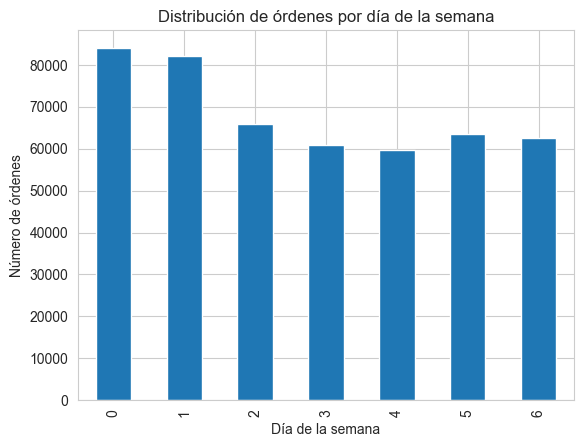

In [32]:
# Analizar la distribución de órdenes por cada día (0 = domingo, 1 = lunes, etc.).
df_instacart_orders['ORDER_DOW'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de órdenes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de órdenes')
plt.show()

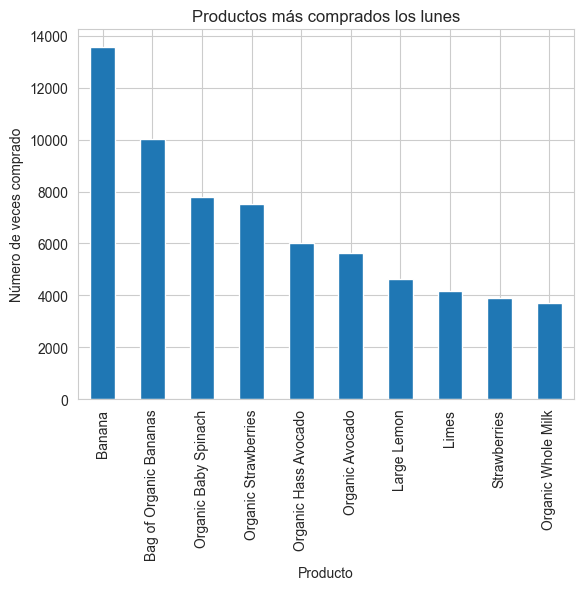

In [33]:
# Analizar el lunes que producto se compró más
df_order_products = df_order_products.merge(df_products, on='PRODUCT_ID')
df_order_products = df_order_products.merge(df_instacart_orders, on='ORDER_ID')
df_order_products[df_order_products['ORDER_DOW'] == 0]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados los lunes')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()


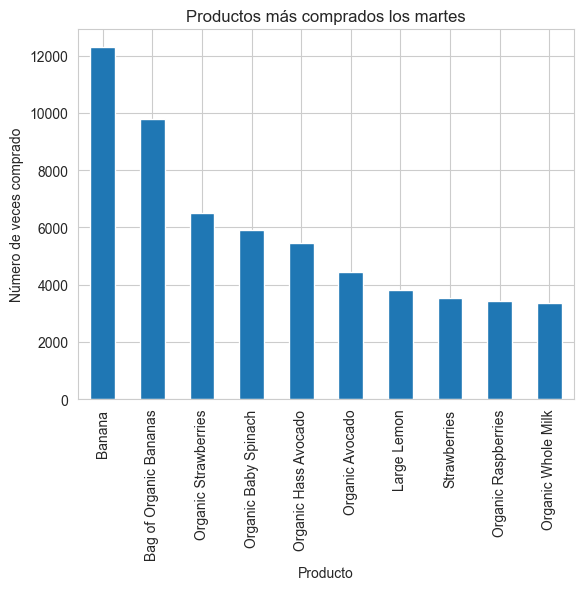

In [34]:
# Analizar el Martes que producto se compró más
df_order_products[df_order_products['ORDER_DOW'] == 1]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados los martes')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()

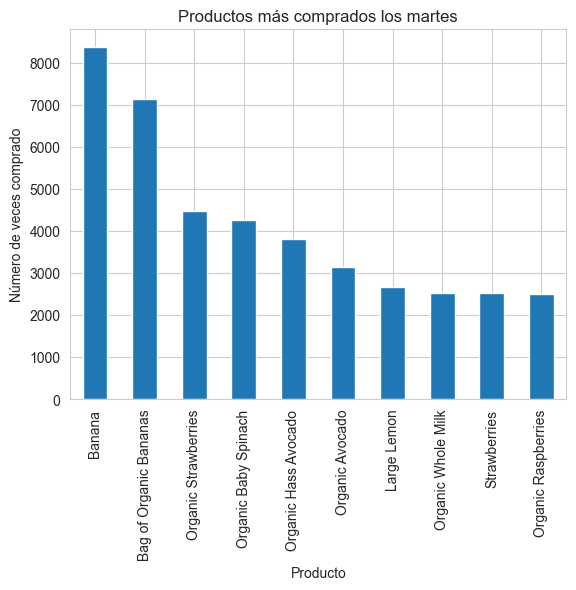

In [35]:
# Analizar el Miercoles que producto se compró más
df_order_products[df_order_products['ORDER_DOW'] == 2]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados los martes')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()

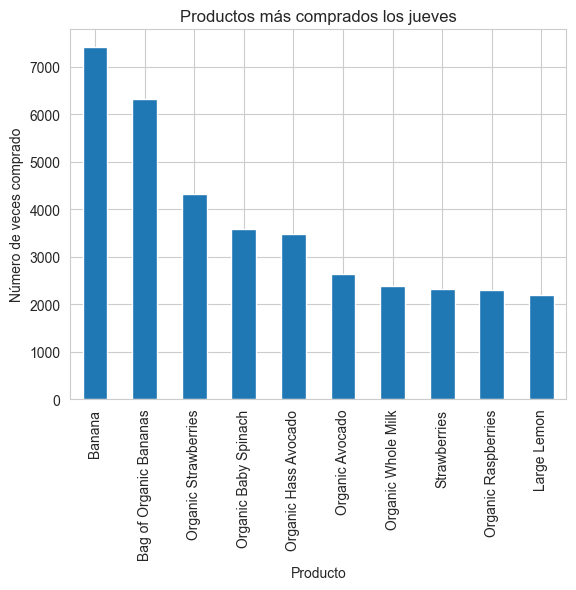

In [36]:
# Jueves
df_order_products[df_order_products['ORDER_DOW'] == 3]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados los jueves')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()

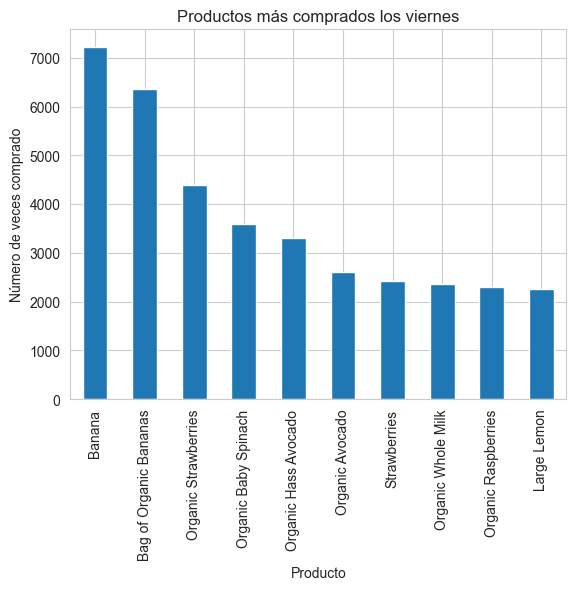

In [37]:
# Viernes
df_order_products[df_order_products['ORDER_DOW'] == 4]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados los viernes')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()

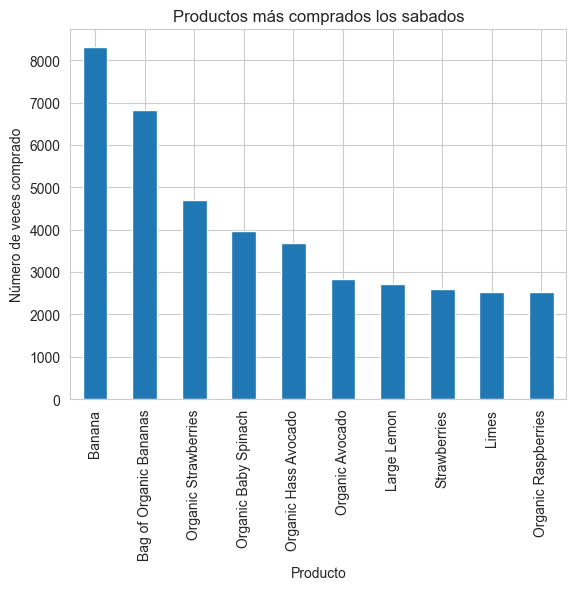

In [38]:
# Sabado
df_order_products[df_order_products['ORDER_DOW'] == 5]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados los sabados')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()

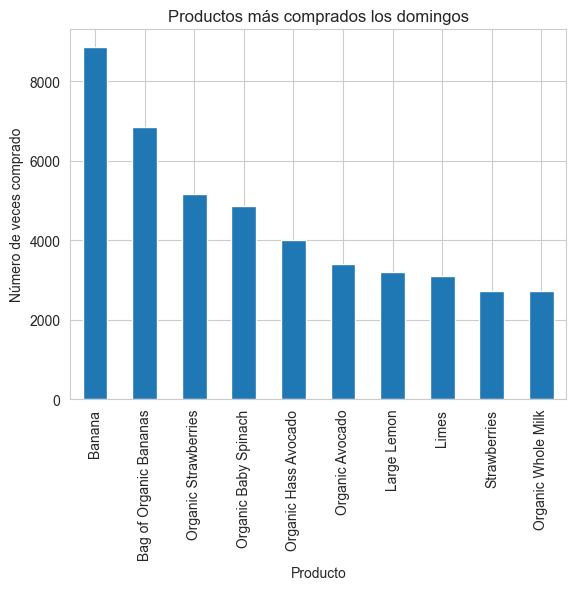

In [39]:
# Domingo
df_order_products[df_order_products['ORDER_DOW'] == 6]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados los domingos')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()


## Comportamiento de compra según hora del día

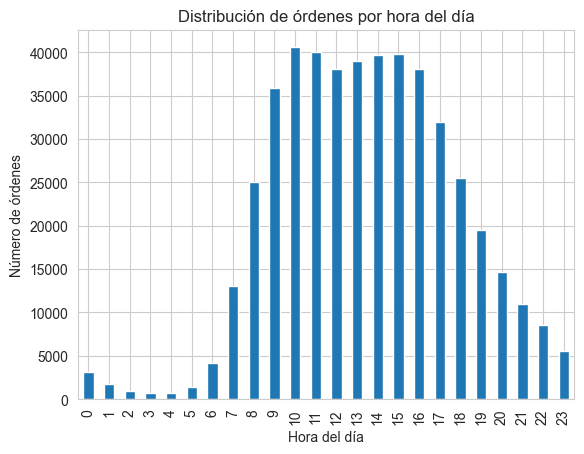

In [40]:
# Analizar la distribución de órdenes por cada hora del día.
df_instacart_orders['ORDER_HOUR_OF_DAY'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de órdenes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.show()

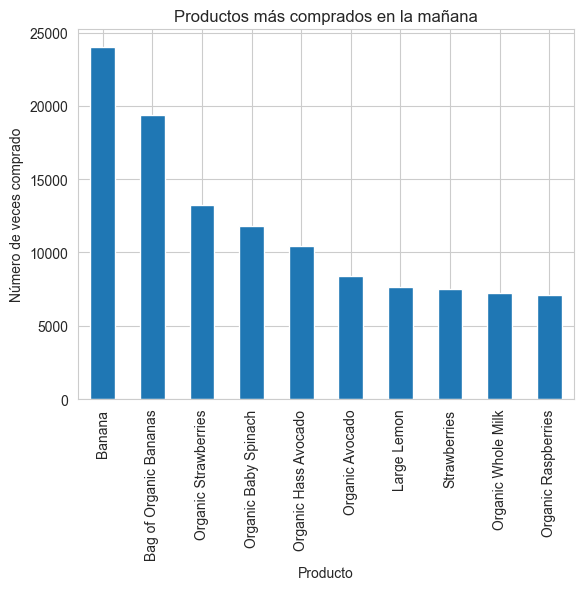

In [41]:
# Que productos se compran más en la mañana
df_order_products[df_order_products['ORDER_HOUR_OF_DAY'] < 12]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados en la mañana')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()

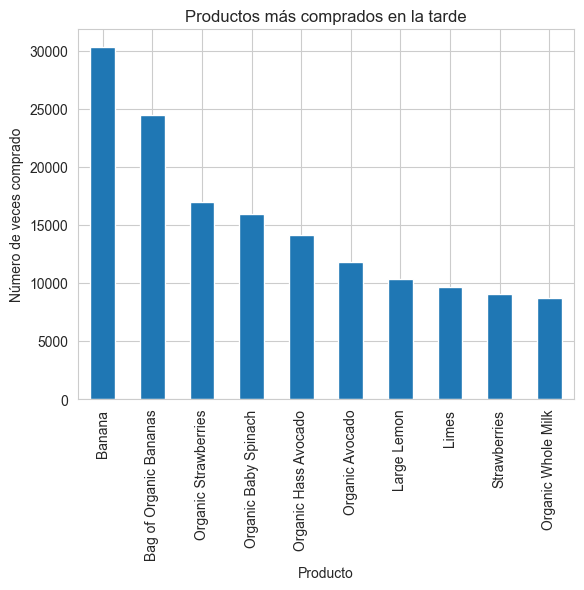

In [42]:
# Que productos se compran más en la tarde
df_order_products[(df_order_products['ORDER_HOUR_OF_DAY'] >= 12) & (df_order_products['ORDER_HOUR_OF_DAY'] < 18)]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados en la tarde')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()


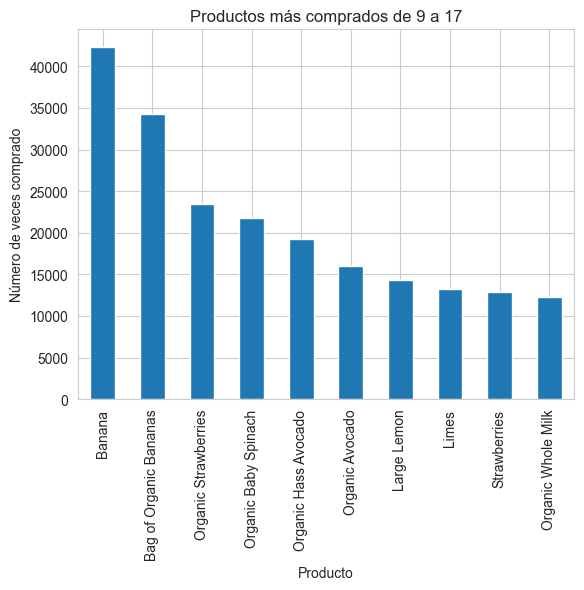

In [43]:
# Que productos compran mas de 9 a 17
df_order_products[(df_order_products['ORDER_HOUR_OF_DAY'] >= 9) & (df_order_products['ORDER_HOUR_OF_DAY'] < 17)]['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')
plt.title('Productos más comprados de 9 a 17')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()


## Comportamiento según hora del día y día de la semana

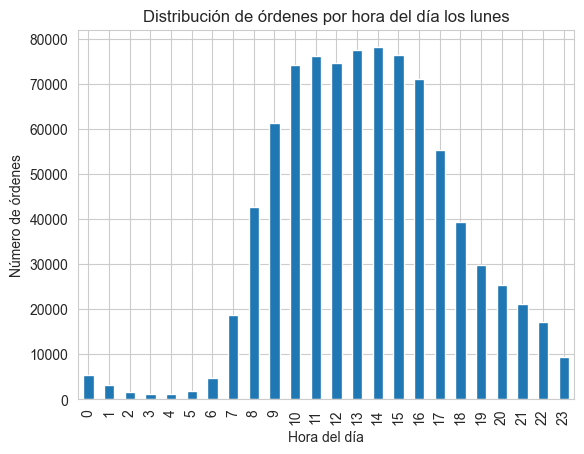

In [48]:
df_order_products[df_order_products['ORDER_DOW'] == 0]['ORDER_HOUR_OF_DAY'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de órdenes por hora del día los lunes')
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.show()

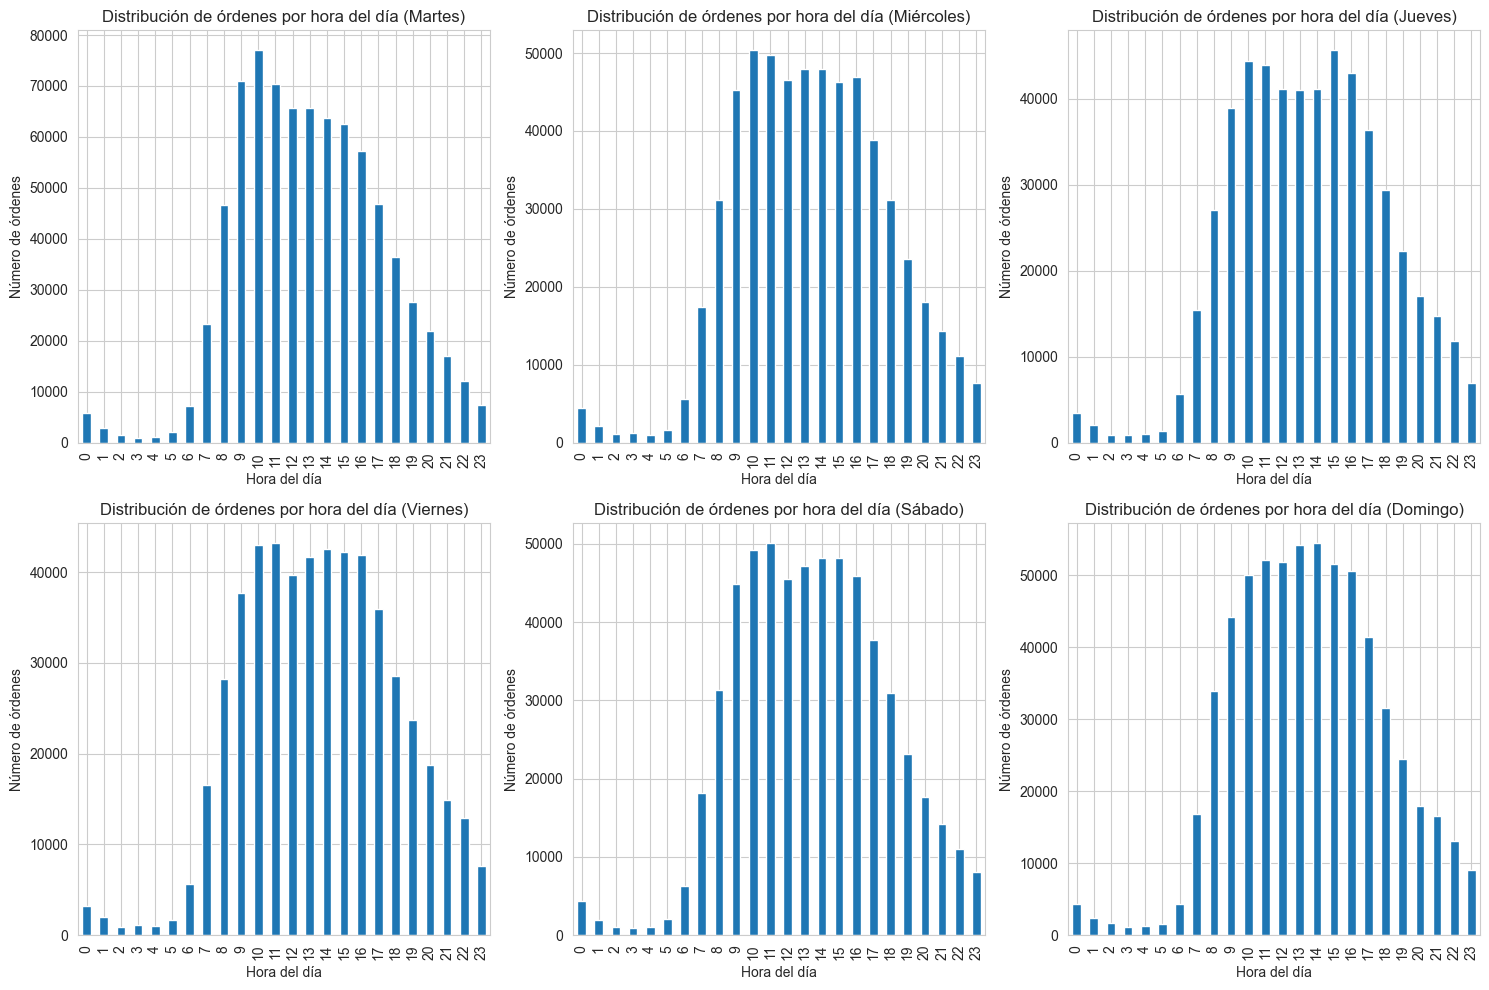

In [49]:
# Crear un grid de subgráficos (filas y columnas)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas

# Días de la semana (0-6)
dias = [ 1, 2, 3, 4, 5, 6]
titulos = ['Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Iterar sobre los días de la semana y sus respectivos ejes
for i, dia in enumerate(dias):
    ax = axes[i // 3, i % 3]  # Obtener el eje correspondiente
    df_order_products[df_order_products['ORDER_DOW'] == dia]['ORDER_HOUR_OF_DAY'].value_counts().sort_index().plot(
        kind='bar', ax=ax)
    ax.set_title(f'Distribución de órdenes por hora del día ({titulos[i]})')
    ax.set_xlabel('Hora del día')
    ax.set_ylabel('Número de órdenes')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


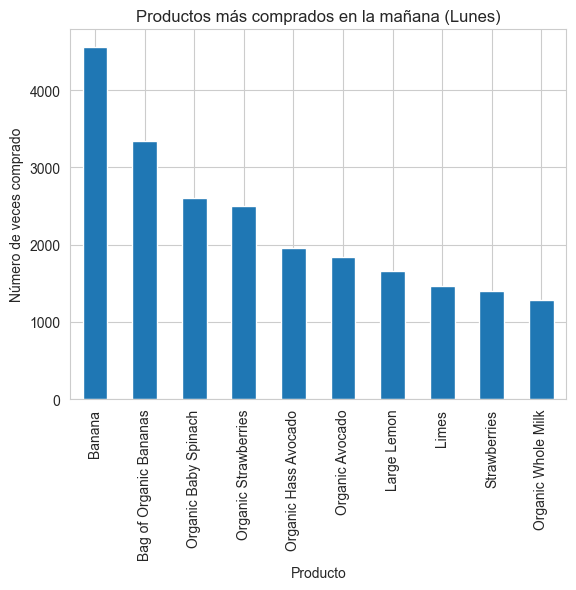

In [54]:
# Filtrar los productos más comprados por la mañana (antes de las 12) los lunes (ORDER_DOW == 0)
df_order_products[(df_order_products['ORDER_DOW'] == 0) & (df_order_products['ORDER_HOUR_OF_DAY'] < 12)]['PRODUCT_NAME'].value_counts().head(10).plot(
    kind='bar')

plt.title('Productos más comprados en la mañana (Lunes)')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')

plt.show()

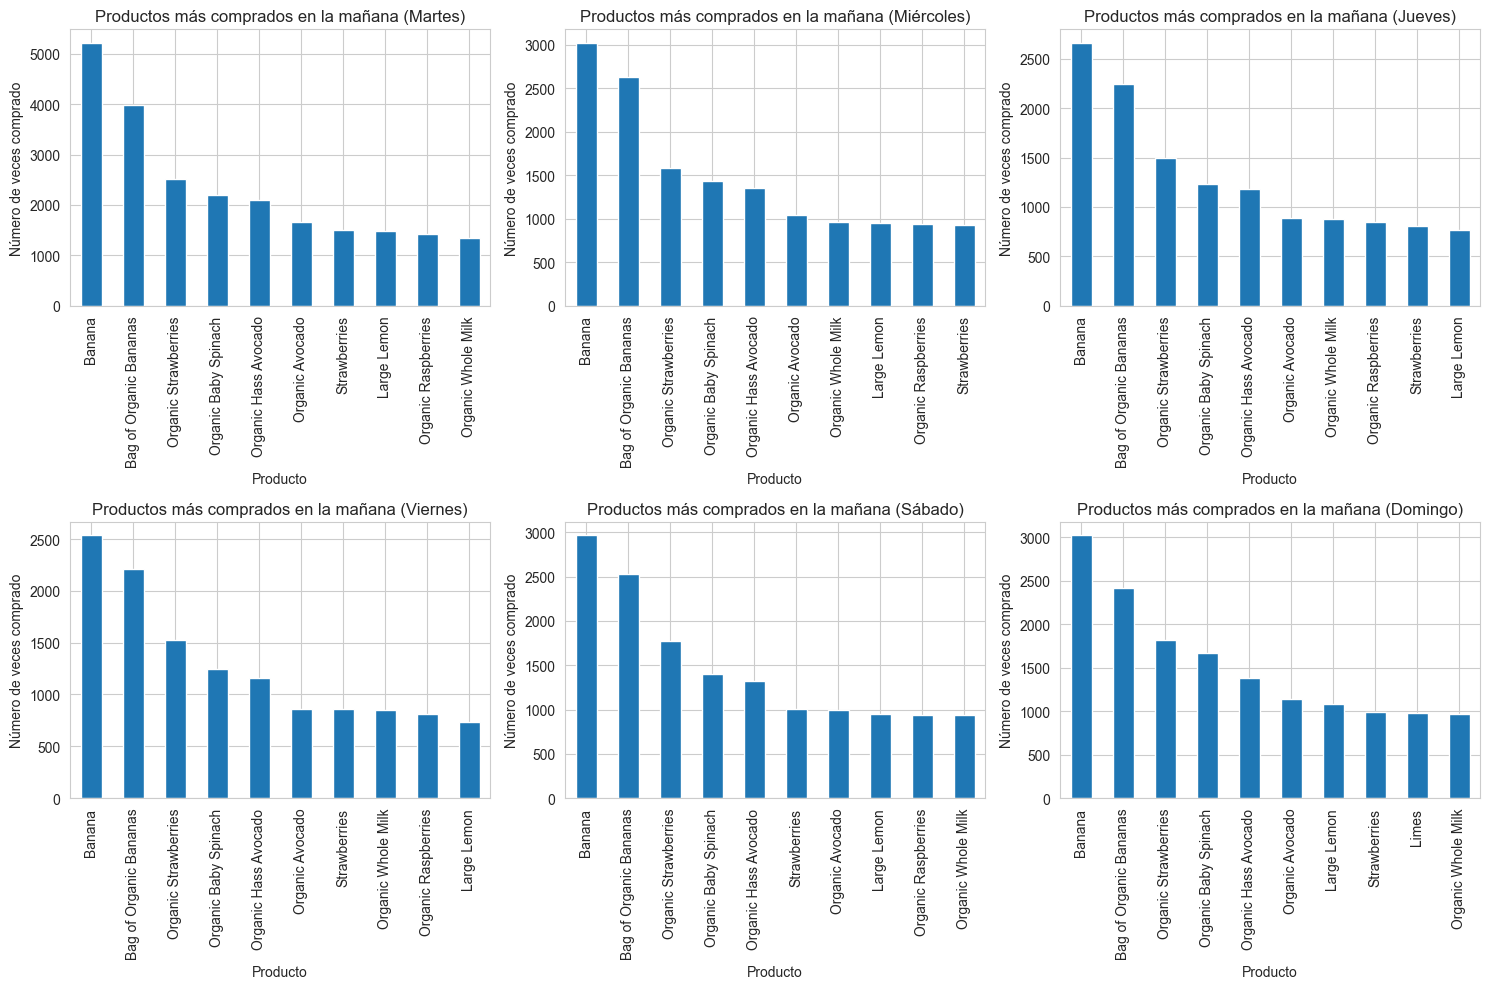

In [50]:
# Crear un grid de subgráficos (filas y columnas)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas

# Días de la semana (0-6)
dias = [1, 2, 3, 4, 5, 6]
titulos = ['Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Iterar sobre los días de la semana y sus respectivos ejes
for i, dia in enumerate(dias):
    ax = axes[i // 3, i % 3]  # Obtener el eje correspondiente
    df_order_products[(df_order_products['ORDER_DOW'] == dia) & (df_order_products['ORDER_HOUR_OF_DAY'] < 12)]['PRODUCT_NAME'].value_counts().head(10).plot(
        kind='bar', ax=ax)
    ax.set_title(f'Productos más comprados en la mañana ({titulos[i]})')
    ax.set_xlabel('Producto')
    ax.set_ylabel('Número de veces comprado')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()

## Distribución de las órdenes hechas por los clientes

In [58]:
# Cuántas órdenes hace uncliente en promedio
df_instacart_orders['USER_ID'].value_counts().mean()

3.042181952145938

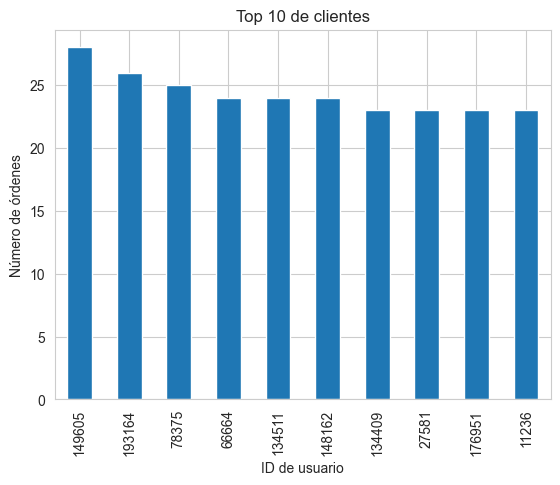

In [62]:
# Top 10 de clientes
df_instacart_orders['USER_ID'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 de clientes')
plt.xlabel('ID de usuario')
plt.ylabel('Número de órdenes')
plt.show()

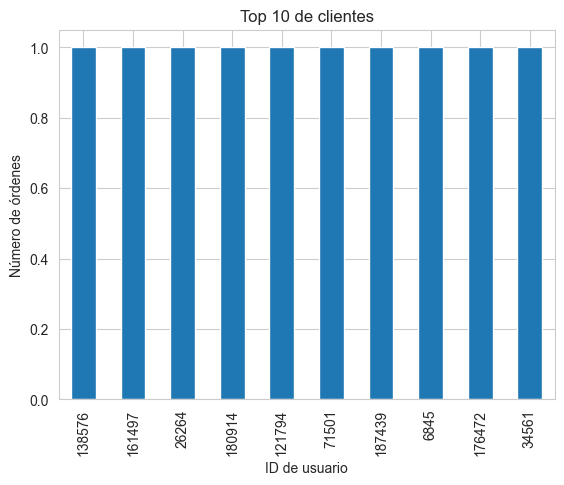

In [63]:
# Top 10 menos clientes
df_instacart_orders['USER_ID'].value_counts().tail(10).plot(kind='bar')
plt.title('Top 10 de clientes')
plt.xlabel('ID de usuario')
plt.ylabel('Número de órdenes')
plt.show()

## Top 20 productos más frecuentes

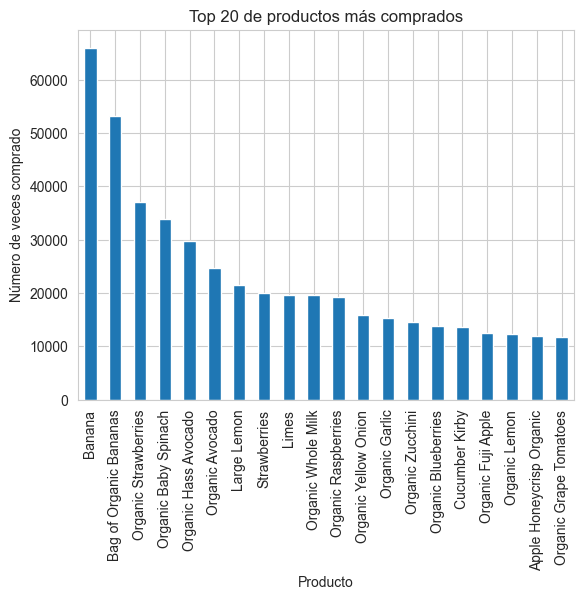

In [64]:
# Top 20 de productos más comprados
df_order_products['PRODUCT_NAME'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 de productos más comprados')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()


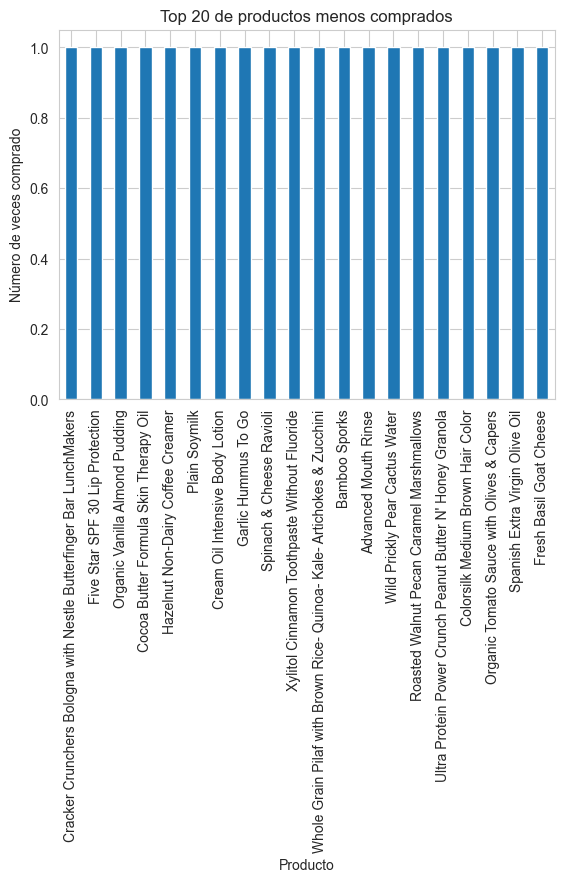

In [65]:
# Top 20 de productos menos comprados
df_order_products['PRODUCT_NAME'].value_counts().tail(20).plot(kind='bar')
plt.title('Top 20 de productos menos comprados')
plt.xlabel('Producto')
plt.ylabel('Número de veces comprado')
plt.show()

## ¿Cuántos artículos se compran generalmente en un pedido?

In [70]:
# Cuantos articulos se compran generalmente en una orden
df_order_products['ORDER_ID'].value_counts().mean()

10.097125627158112

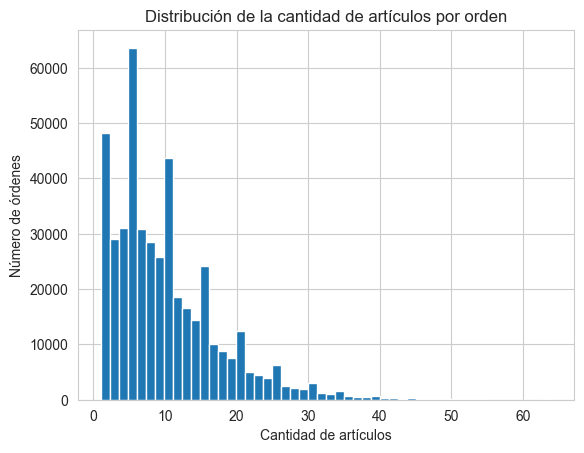

In [68]:
# Distribución de la cantidad de artículos por orden
df_order_products['ORDER_ID'].value_counts().plot(kind='hist', bins=50)
plt.title('Distribución de la cantidad de artículos por orden')
plt.xlabel('Cantidad de artículos')
plt.ylabel('Número de órdenes')
plt.show()

## Top 20 artículos que se vuelven a pedir con más frecuencia

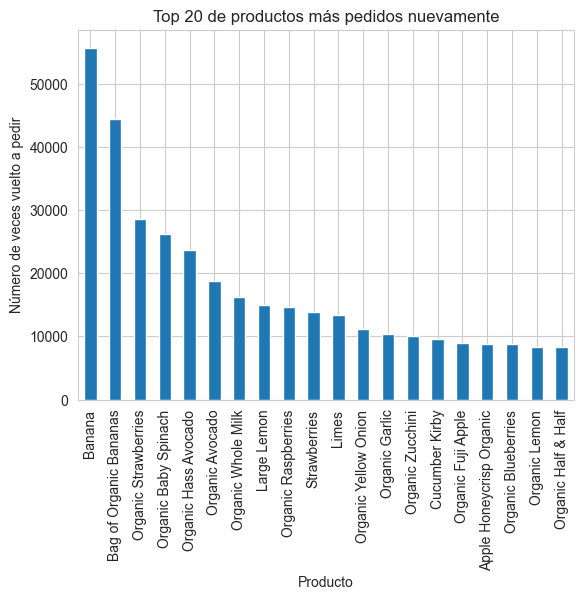

In [72]:
# Top 20 articulos que se vuelven a pedir
# Filtrar productos que se han vuelto a pedir (REORDERED == 1)
df_order_products[df_order_products['REORDERED'] == 1]['PRODUCT_NAME'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 de productos más pedidos nuevamente')
plt.xlabel('Producto')
plt.ylabel('Número de veces vuelto a pedir')

plt.show()

## Proporción de pedidos que se vuelven a pedir para cada producto

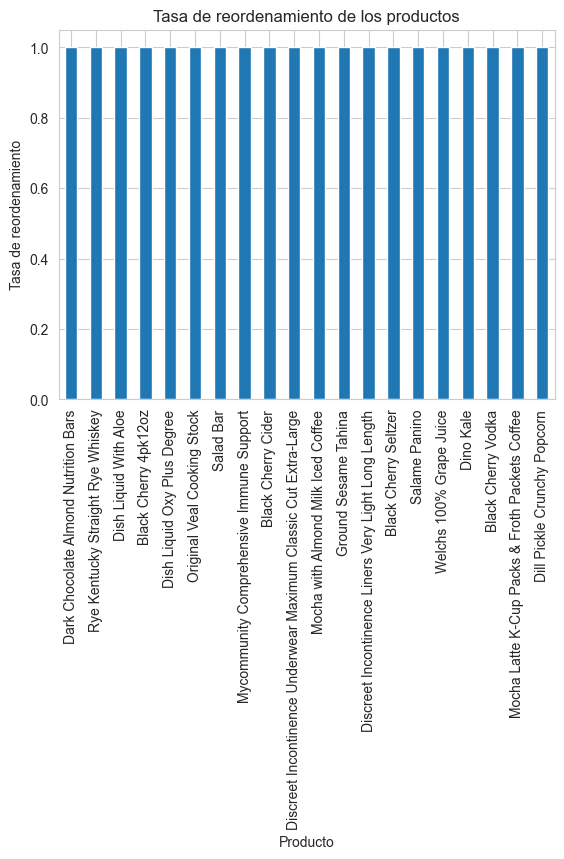

In [ ]:
# Para cada producto calcular cuántas veces es “reordenado” respecto al total de pedidos del mismo
tasa_reordenamiento = df_order_products.groupby('PRODUCT_NAME')['REORDERED'].mean()
tasa_reordenamiento.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Tasa de reordenamiento de los productos')
plt.xlabel('Producto')
plt.ylabel('Tasa de reordenamiento')
plt.show()

## Proporción de productos pedidos que se vuelven a pedir para cada cliente

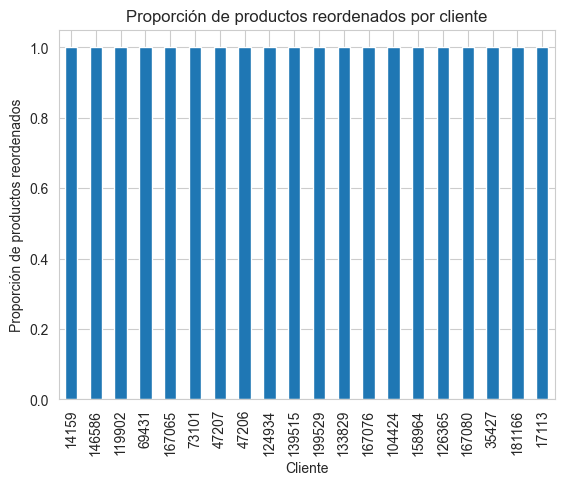

In [79]:
# Agrupar por cliente y producto
cliente_producto = df_order_products.groupby(['USER_ID', 'PRODUCT_NAME']).agg(
    productos_comprados=('PRODUCT_NAME', 'count'),  # Número de veces que un cliente ha comprado un producto
    productos_reordenados=('REORDERED', 'sum')  # Número de veces que un producto ha sido reordenado por el cliente
).reset_index()

# Calcular la proporción de productos reordenados por cliente
cliente_producto['proporcion_reordenado'] = cliente_producto['productos_reordenados'] / cliente_producto['productos_comprados']

# Agrupar por cliente y calcular la proporción promedio de productos reordenados
proporcion_por_cliente = cliente_producto.groupby('USER_ID')['proporcion_reordenado'].mean()

# Mostrar el top 20 de clientes con mayor proporción de productos reordenados
proporcion_por_cliente.sort_values(ascending=False).head(20).plot(kind='bar')

# Títulos y etiquetas
plt.title('Proporción de productos reordenados por cliente')
plt.xlabel('Cliente')
plt.ylabel('Proporción de productos reordenados')

# Mostrar el gráfico
plt.show()

## Top 20 artículos que la gente pone primero en el carrito

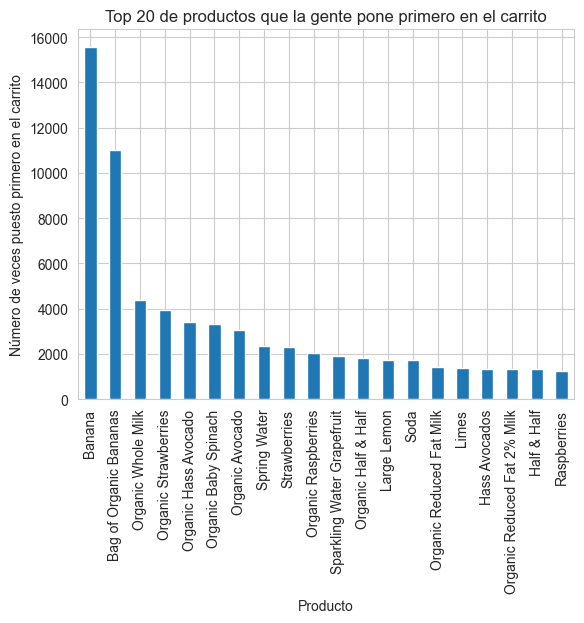

In [80]:
# top 20 productos que la gente pone primero en el carrito
df_order_products[df_order_products['ADD_TO_CART_ORDER'] == 1]['PRODUCT_NAME'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 de productos que la gente pone primero en el carrito')
plt.xlabel('Producto')
plt.ylabel('Número de veces puesto primero en el carrito')
plt.show()